# Parcial 1 - Nikolas Rodriguez

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go

In [60]:
df = pd.read_csv('Dataset.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,non-binary,group B,bachelor's degree,standard,none,72.0,72.0,NaN
1,female,group C,some college,standard,completed,69.0,90.0,88.0
2,female,group B,master's degree,standard,none,90.0,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,NaN,57.0,44.0
4,male,group C,some college,standard,none,76.0,78.0,75.0


## Punto1: Tipo de variables del Dataset

In [14]:
df.dtypes

gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math score                     float64
reading score                  float64
writing score                  float64
dtype: object

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       953 non-null    object 
 1   race/ethnicity               955 non-null    object 
 2   parental level of education  940 non-null    object 
 3   lunch                        946 non-null    object 
 4   test preparation course      959 non-null    object 
 5   math score                   949 non-null    float64
 6   reading score                952 non-null    float64
 7   writing score                951 non-null    float64
dtypes: float64(3), object(5)
memory usage: 62.6+ KB


## Punto2: Limpieza y calidad de datos

### Revisión de datos nulos o faltantes

La variable con más datos nulos es el nivel de educación parental con aproximadamente un 6%

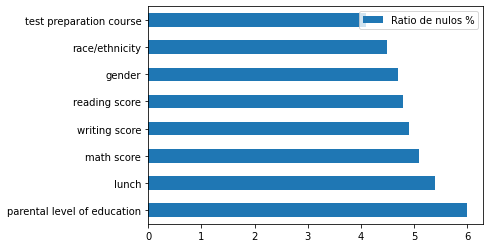

In [22]:
def plot_nas(df: pd.DataFrame):
    if df.isnull().sum().sum() != 0:
        na_df = (df.isnull().sum() / len(df)) * 100      
        na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False)
        missing_data = pd.DataFrame({'Ratio de nulos %' :na_df})
        missing_data.plot(kind = "barh")
        plt.show()
    else:
        print('No NAs found')
plot_nas(df)

### Eliminación de nulos
Debido a que solo un 6% de datos contienen datos nulos es prudente depurar los valores númericos

In [88]:
df['reading score'] = df['reading score'].fillna(df['reading score'].mean())
df['math score'] = df['math score'].fillna(df['reading score'].mean())
df['writing score'] = df['writing score'].fillna(df['reading score'].mean())

#### Verificación de valores atípicos o mal diligenciados en las variables categoricas

Se puede observar que las variables contienen sus categorías bien definidas y sin valores mal diligenciados o sin sentido

In [25]:
def barplot_visualization(x):
  fig = plt.Figure(figsize = (8, 3))
  fig = px.bar(x = df[x].value_counts().index, y = df[x].value_counts(), color = df[x].value_counts().index, height = 600)
  fig.show()

In [26]:
barplot_visualization('gender')

In [27]:
barplot_visualization('race/ethnicity')

In [28]:
barplot_visualization('parental level of education')

In [29]:
barplot_visualization('lunch')

In [30]:
barplot_visualization('test preparation course')

#### Verificación que los rangos de las variables númericas están entre [0,100]

array([[<AxesSubplot:title={'center':'math score'}>,
        <AxesSubplot:title={'center':'reading score'}>],
       [<AxesSubplot:title={'center':'writing score'}>, <AxesSubplot:>]],
      dtype=object)

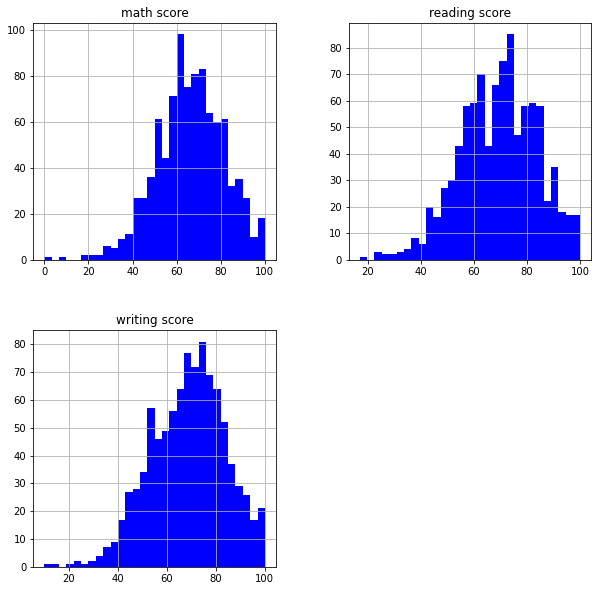

In [32]:
df.hist(bins = 30, figsize = (10,10), color = 'b')

In [36]:
df.loc[(df['math score']<0) | (df['math score']>100)]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score


In [37]:
df.loc[(df['reading score']<0) | (df['reading score']>100)]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score


In [38]:
df.loc[(df['writing score']<0) | (df['writing score']>100)]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score


## Punto3.  ¿En qué asignatura en promedio los estudiantes obtuvieron un mejor puntaje? ¿Hay evidencia de algún sesgo en la distribución de dichos puntajes?


array([[<AxesSubplot:title={'center':'math score'}>,
        <AxesSubplot:title={'center':'reading score'}>],
       [<AxesSubplot:title={'center':'writing score'}>, <AxesSubplot:>]],
      dtype=object)

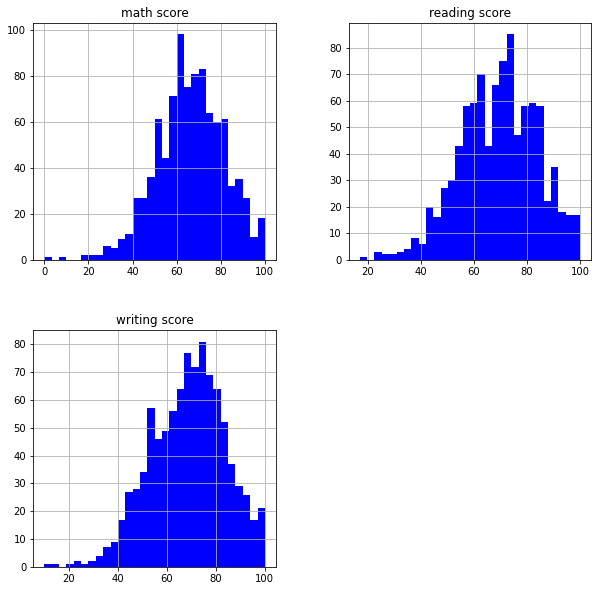

In [39]:
df.hist(bins = 30, figsize = (10,10), color = 'b')

In [53]:
print("Promedio en Matemáticas: "+str(df['math score'].mean()))
print("Promedio en Lectura: "+str(df['reading score'].mean()))
print("Promedio en Escritura: "+str(df['writing score'].mean()))

maximo = [df['math score'].mean(), df['reading score'].mean(), df['writing score'].mean()]

print("el mayor promedio es: " + str(max(maximo)) + "Y corresponde a Lectura")

Promedio en Matemáticas: 66.26567164179104
Promedio en Lectura: 69.54477611940298
Promedio en Escritura: 68.47164179104477
el mayor promedio es: 69.54477611940298Y corresponde a Lectura


## Punto4. ¿existe correlación entre los puntajes obtenidos? 

Realizando un análisis de dispersión se logra observar una fuerte relación lineal entre las tres variables de calificación, razón por la cual se decide hacer un análisis de correlación de spearman encontrando que entre las tres tienen correlación por encima del 80%

In [47]:
plt.figure(figsize = (10, 10))

fig = px.scatter_matrix(df,
    dimensions = df.columns[5:], color = 'gender')

fig.update_layout(
    title = 'Distribuciones',
    width = 1100,
    height = 1100,
)
fig.show()

<Figure size 720x720 with 0 Axes>

<AxesSubplot:>

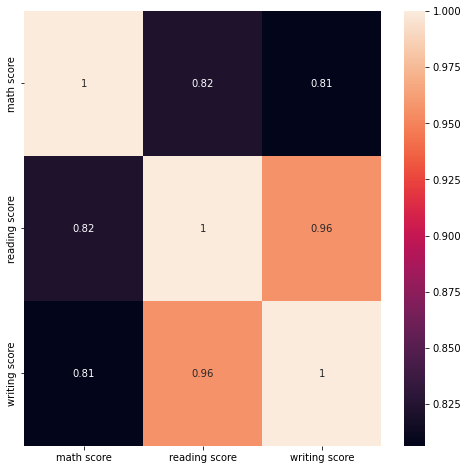

In [55]:
correlations = df.corr()
f, ax = plt.subplots(figsize = (8, 8))
sns.heatmap(correlations, annot = True)

## Punto5.  ¿Hay alguna diferencia observable en los puntajes de la asignatura de matemáticas entre géneros? 
¿Qué género obtuvo en promedio los mejores puntajes?


<AxesSubplot:xlabel='gender', ylabel='math score'>

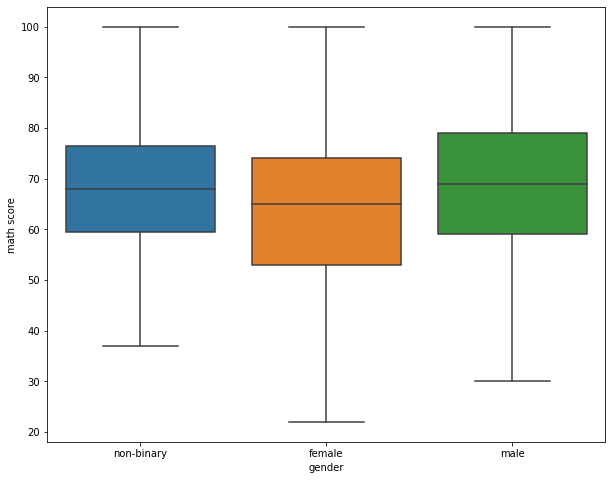

In [64]:
df_male = df.loc[df['gender'] == 'male']
df_female = df.loc[df['gender'] == 'female']

plt.figure(figsize=[10,8])
sns.boxplot(x = 'gender', y = 'math score', data = df, showfliers = False)

#plt.xlim(0, 200000)

In [66]:
fig = px.box(df, x = "gender", y="math score", points="all")
fig.update_traces(quartilemethod="inclusive")
 
fig.show()

## Punto6. Encuentre:
¿Qué nivel de escolaridad tienen los padres de los estudiantes que obtuvieron
un puntaje por encima del percentil 85 en la asignatura de escritura? ¿Cómo se
distribuye la escolaridad entre esta población?.


In [76]:
df_85 = df[df['writing score'] > df['writing score'].quantile(.95)]
df_85['writing score'] = df_85['writing score'].fillna(df['writing score'].mean())
df_85['writing score'].mean()

C:\Users\rodriguezns\AppData\Local\Temp\ipykernel_26044\2968651697.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



96.77272727272727

In [78]:
fig = plt.Figure(figsize = (8, 3))
fig = px.bar(x = df_85['parental level of education'].value_counts().index, 
        y = df_85['parental level of education'].value_counts(), 
        color = df_85['parental level of education'].value_counts().index, height = 600)
fig.show()

## 7. Conteste
¿Qué porcentaje de los estudiantes obtuvieron puntajes iguales o superiores a
90 en las tres asignaturas? De estos estudiantes¿que porcentaje estudió para
los exámenes?


In [87]:
df_juiciosos = df[(df['math score']>90) & (df['reading score']>90) & (df['writing score']>90)]
print("del 100% de estudiantes solo el: " + str((df_juiciosos.shape[0]/df.shape[0])*100) + "% Aprobo las 3 materias por encima de 90")

del 100% de estudiantes solo el: 1.9% Aprobo las 3 materias por encima de 90
